In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/python-practical-exam/MD_agric_exam-4313.csv


In [2]:
MD_agric_df = pd.read_csv("/kaggle/input/python-practical-exam/MD_agric_exam-4313.csv")

In [3]:
MD_agric_df.head()

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana
3,5351,594.80370,1748.0,-4.3,33.6,6.477415,0.088777,7.9,4.351564,wheat
4,905,609.49800,1395.8,-4.5,31.3,5.419586,0.050023,10.8,5.034791,cassava


1. Write code to determine the number of `unique crop` types in the dataset?

In [4]:
unique_crop_types = MD_agric_df['Crop_type'].unique()
number_of_unique_crop_types = len(unique_crop_types)

print("Number of unique crop types:", number_of_unique_crop_types)

Number of unique crop types: 8


In [5]:
unique_crop_types = list(MD_agric_df['Crop_type'].unique())
unique_crop_types

['coffee', 'potato', 'banana', 'wheat', 'cassava', 'maize', 'tea', 'rice']

2. Identify the maximum annual yield for "wheat" crop type in the dataset (rounded to 2 decimal places).

In [6]:

# Filter the DataFrame for wheat crop type
wheat_data = MD_agric_df[MD_agric_df['Crop_type'] == 'wheat']

# Find the maximum annual yield for wheat crop type
max_annual_yield_wheat = wheat_data['Annual_yield'].max()

# Round the result to 2 decimal places
max_annual_yield_wheat_rounded = round(max_annual_yield_wheat, 2)

print("Maximum annual yield for wheat crop type:", max_annual_yield_wheat_rounded)

Maximum annual yield for wheat crop type: 8.99


In [7]:
# Another technique of using groub by and sort
max_annual_yield_wheat_rounded = (
    round(MD_agric_df[MD_agric_df['Crop_type'] == 'wheat']
    .groupby('Crop_type')
          .max().sort_values(by='Annual_yield', ascending=False)
          .iloc[0]['Annual_yield'], 2)
)
max_annual_yield_wheat_rounded

8.99

3. Find the total rainfall for crop types where the average pollution level is above 0.2.

In [8]:
# Filter the DataFrame for crop types where the average pollution level is above 0.2
filtered_data = (
    MD_agric_df.groupby('Crop_type')
    .filter(lambda x: x['Pollution_level']
            .mean() > 0.2)
)

# Calculate the total rainfall for the filtered crop types
total_rainfall_filtered = filtered_data['Rainfall'].sum()

# Display my results
print("Total rainfall crops with poll level > 0.2:", total_rainfall_filtered)


Total rainfall crops with poll level > 0.2: 941959.7


4.Write a function to calculate the temperature range (Max_temperature_C - Min_temperature_C) for each farmer's field. Then, call the function with the following `Field_ID`: `1458`, `1895`, and `5443`. What are the results of these 3 calls?

In [9]:
def calculate_temperature_range(df, field_ids):
    results = {}
    for field_id in field_ids:
        field_data = MD_agric_df[MD_agric_df['Field_ID'] == field_id]
        if not field_data.empty:
            min_temp = field_data['Min_temperature_C'].iloc[0]
            max_temp = field_data['Max_temperature_C'].iloc[0]
            temperature_range = max_temp - min_temp
            results[field_id] = temperature_range
        else:
            results[field_id] = None
    return results

# Call the function with the provided Field_IDs
field_ids = [1458, 1895, 5443]
temperature_ranges = calculate_temperature_range(MD_agric_df, field_ids)

print("Temperature ranges for the provided Field_IDs:")
for field_id, temp_range in temperature_ranges.items():
    print(f"Field_ID: {field_id}, Temperature Range: {temp_range}")

Temperature ranges for the provided Field_IDs:
Field_ID: 1458, Temperature Range: 40.7
Field_ID: 1895, Temperature Range: 35.7
Field_ID: 5443, Temperature Range: 33.4


5. Write code to calculate the total plot size for plots where the pH is less than 5.5.

In [10]:
MD_agric_df.head(1)

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee


In [11]:
# Filter the DataFrame for plots where the pH is less than 5.5
filtered_data = MD_agric_df[MD_agric_df['pH'] < 5.5]

# Calculate the total plot size for the filtered plots
total_plot_size_filtered = filtered_data['Plot_size'].sum()

print("Total plot size for plots with pH less than 5.5:", total_plot_size_filtered)


Total plot size for plots with pH less than 5.5: 1731.8999999999999


6. Using Pandas, create a dataframe that includes entries with a 'Min_temperature_C’< -5 and a 'Max_temperature_C' > 30. How many rows are in the filtered dataset?

In [12]:
# Filter the DataFrame for entries with 'Min_temperature_C' < -5 
# and 'Max_temperature_C' > 30
filtered_df = (
    MD_agric_df[(MD_agric_df['Min_temperature_C'] < -5) 
                & (MD_agric_df['Max_temperature_C'] > 30)]
)

# Get the number of rows in the filtered dataset
num_rows_filtered = filtered_df.shape[0]

print("Number of rows in the filtered dataset:", num_rows_filtered)

Number of rows in the filtered dataset: 319


7. Using Numpy, calculate the standard deviation of the 'Rainfall' for plots where the 'Plot_size' is larger than the median plot size of the dataset (round to 2 decimal places).

In [13]:
import numpy as np

# Calculate the median plot size of the dataset
median_plot_size = np.median(MD_agric_df['Plot_size'])

# Filter the DataFrame for plots where the 'Plot_size' is larger than the median plot size
filtered_data = MD_agric_df[MD_agric_df['Plot_size'] > median_plot_size]

# Calculate the standard deviation of the 'Rainfall' for the filtered plots
std_dev_rainfall = np.std(filtered_data['Rainfall'])

# Round the result to 2 decimal places
std_dev_rainfall_rounded = round(std_dev_rainfall, 2)

print("Standard deviation of Rainfall for plots with Plot_size larger than median:", std_dev_rainfall_rounded)


Standard deviation of Rainfall for plots with Plot_size larger than median: 469.62


8. If you concatenate the first three digits of the most common ‘Max_temperature_C’ with the last three letters of the least common 'Crop_type', what string do you get?
Note: Use the first mode if there are multiple modes

In [14]:
import pandas as pd

# Find the mode of 'Max_temperature_C' (taking the first mode if there are multiple modes)
max_temp_mode = MD_agric_df['Max_temperature_C'].mode().iloc[0]

# Find the least common 'Crop_type'
crop_type_least_common = MD_agric_df['Crop_type'].value_counts().idxmin()

# Concatenate the first three digits of the most common 'Max_temperature_C' with the last three letters of the least common 'Crop_type'
result_string = str(max_temp_mode)[:3] + crop_type_least_common[-3:]

print("Result string:", result_string)

Result string: 30.ice


9. Write Python code to create a violin plot visualising the distribution of 'Annual_yield' across different 'Elevation' ranges. Use the provided elevation range categories (Low: < 300m, Medium: 300m - 600m, High: > 600m) to categorise the data before plotting.  Examine the violin plot displaying the distribution of 'Annual Yield' across three elevation categories (Low, Medium, High). What insight does the violin plot provide regarding the relationship between elevation ranges and annual yield distribution?

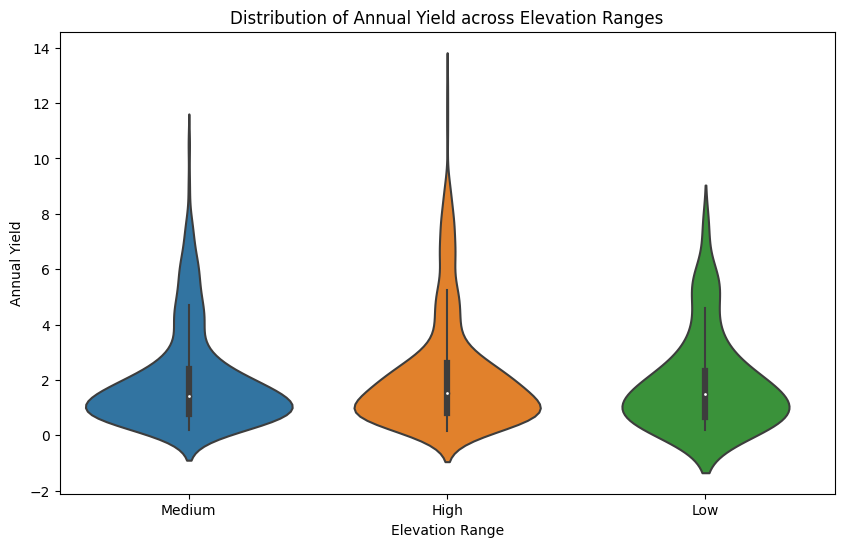

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categorize elevation ranges
def categorize_elevation(elevation):
    if elevation < 300:
        return 'Low'
    elif elevation >= 300 and elevation <= 600:
        return 'Medium'
    else:
        return 'High'

# Apply categorization to create a new column 'Elevation_Category'
MD_agric_df['Elevation_Category'] = MD_agric_df['Elevation'].apply(categorize_elevation)

# Create violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Elevation_Category', y='Annual_yield', data=MD_agric_df)
plt.title('Distribution of Annual Yield across Elevation Ranges')
plt.xlabel('Elevation Range')
plt.ylabel('Annual Yield')
plt.show()

10. Assuming each 'Crop_type' contributes an integer value equal to its length (e.g., 'wheat' contributes 5), write a recursive function to sum the integer values for each unique crop type in the dataset. What is the sum?

In [16]:
def crop_type_sum(data):
    unique_crops = set(data['Crop_type'].unique())
    total_sum = sum(len(crop) for crop in unique_crops)
    return total_sum

# Calculate the sum
total_sum = crop_type_sum(MD_agric_df)

print("The sum of integer values for each unique crop type:", total_sum)


The sum of integer values for each unique crop type: 42


11. Write Python code to perform a t-test comparing the average 'Annual_yield' between 'coffee' and 'banana' crop types using scipy.stats. What is the p-value, rounded to three decimal places?

In [17]:
from scipy.stats import ttest_ind

# Filter the data for 'coffee' and 'banana' crop types
coffee_yield = MD_agric_df[MD_agric_df['Crop_type'] == 'coffee']['Annual_yield']
banana_yield = MD_agric_df[MD_agric_df['Crop_type'] == 'banana']['Annual_yield']

# Perform t-test
t_statistic, p_value = ttest_ind(coffee_yield, banana_yield)

# Round the p-value to three decimal places
p_value_rounded = round(p_value, 3)

print("The p-value for the t-test comparing the average 'Annual_yield' between 'coffee' and 'banana' crop types:", p_value_rounded)


The p-value for the t-test comparing the average 'Annual_yield' between 'coffee' and 'banana' crop types: 0.598
